<a href="https://colab.research.google.com/github/jeanpm04/AED-g03/blob/main/Copia_de_PROYECTO_FINAL_FASE_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ======================
# READING DATA
# ======================
import pandas as pd

df = pd.read_csv('/content/DATASET_PROYECTO.csv')

# Muestra rápida de 10 filas y las columnas más relevantes
display(df.head(1000))

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
# Mostrar nombres de columnas y tipos
print(df.info())

# Ejemplo breve de descripción de columnas
print("""
Descripción rápida de las columnas:
- Branch: Sucursal (A, B, C)
- Date: Fecha de la venta
- Unit price: Precio unitario del producto
- Tax 5%: Impuesto aplicado
- Product line: Línea de producto
- Customer type: Tipo de cliente (Member o Normal)
- Gender: Género del cliente
- Payment: Método de pago
- Quantity: Cantidad vendida (variable objetivo)
""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# ======================
# DATA PROCESSING
# ======================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Limpieza y nuevas columnas
df['Branch'] = df['Branch'].map({'A': 'Yangon', 'B': 'Mandalay', 'C': 'Naypyitaw'})
df['Date']   = pd.to_datetime(df['Date'], errors='coerce')
df['Day']    = df['Date'].dt.day
df['Month']  = df['Date'].dt.month

features = ['Unit price', 'Tax 5%', 'Day', 'Month',
            'Product line', 'Branch', 'Customer type', 'Gender', 'Payment']
target   = 'Quantity'

categorical_features = ['Product line', 'Branch', 'Customer type', 'Gender', 'Payment']
numeric_features     = ['Unit price', 'Tax 5%', 'Day', 'Month']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numeric_features)
])
X_processed = preprocessor.fit_transform(df[features])

print("Shape antes :", df[features].shape)
print("Shape después:", X_processed.shape)


Shape antes : (1000, 9)
Shape después: (1000, 20)


In [ ]:
# ======================
# READING DATA (POST-PROCESSING)
# ======================
import numpy as np

# 1) Obtener los nombres de cada bloque del ColumnTransformer
cat_ohe_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_cols     = numeric_features                     # ya definidas arriba

# 2) Combinar nombres para el DataFrame resultante
processed_cols = np.concatenate([cat_ohe_cols, num_cols])

# 3) Construir un DataFrame con X_processed
df_processed = pd.DataFrame(X_processed, columns=processed_cols)

# 4) Mostrar una muestra y la forma final
display(df_processed.head(1000))
print(f"DataFrame procesado shape: {df_processed.shape}")
print(df_processed.describe().T)       # estadísticos de las columnas numéricas ya escaladas


,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Branch_Mandalay,Branch_Naypyitaw,Branch_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,Unit price,Tax 5%,Day,Month
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.718160,0.919607,-1.180314,-1.189455
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-1.525303,-0.987730,-0.835058,1.206225
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.352781,0.071446,-1.410484,1.206225
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.096214,0.675780,1.351560,-1.189455
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.156959,1.267125,-0.835058,0.008385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.578600,-1.141750,1.581731,-1.189455
996,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.574989,2.846340,-1.525569,1.206225
997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.899958,-1.178109,-0.719973,0.008385
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.383208,-1.032932,0.776135,0.008385


DataFrame procesado shape: (1000, 20)
                                      count          mean       std       min  \
Product line_Electronic accessories  1000.0  1.700000e-01  0.375821  0.000000   
Product line_Fashion accessories     1000.0  1.780000e-01  0.382704  0.000000   
Product line_Food and beverages      1000.0  1.740000e-01  0.379299  0.000000   
Product line_Health and beauty       1000.0  1.520000e-01  0.359201  0.000000   
Product line_Home and lifestyle      1000.0  1.600000e-01  0.366789  0.000000   
Product line_Sports and travel       1000.0  1.660000e-01  0.372267  0.000000   
Branch_Mandalay                      1000.0  3.320000e-01  0.471167  0.000000   
Branch_Naypyitaw                     1000.0  3.280000e-01  0.469720  0.000000   
Branch_Yangon                        1000.0  3.400000e-01  0.473946  0.000000   
Customer type_Member                 1000.0  5.010000e-01  0.500249  0.000000   
Customer type_Normal                 1000.0  4.990000e-01  0.500249  0.

In [ ]:
# ======================
# DATA INSPECTION
# ======================
import matplotlib.pyplot as plt
import seaborn as sns

print(df.isna().sum())      # Conteo de nulos
print(df.describe())        # Estadísticos numéricos


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
dtype: int64
        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      

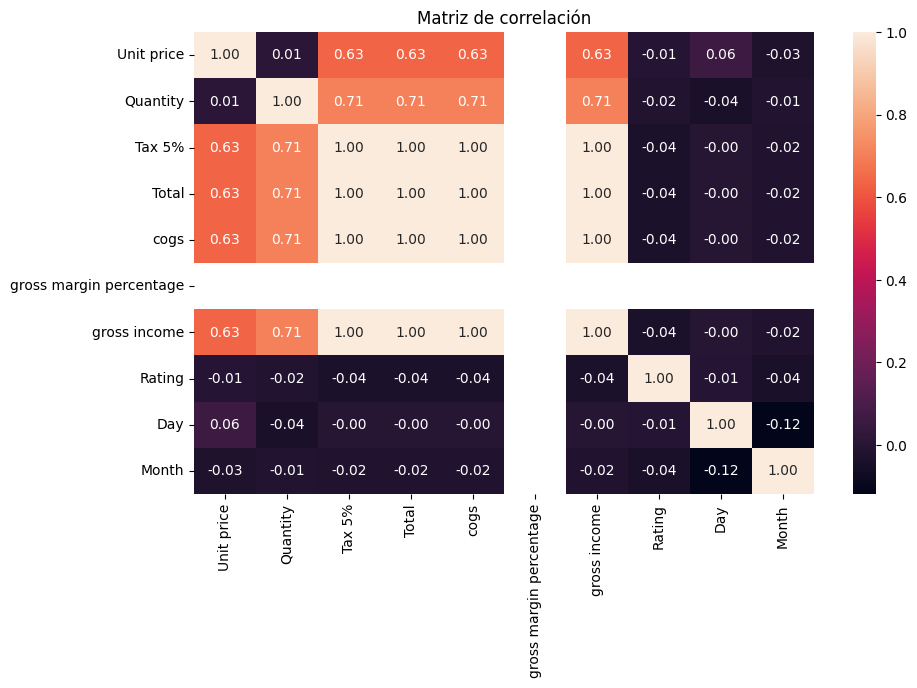

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


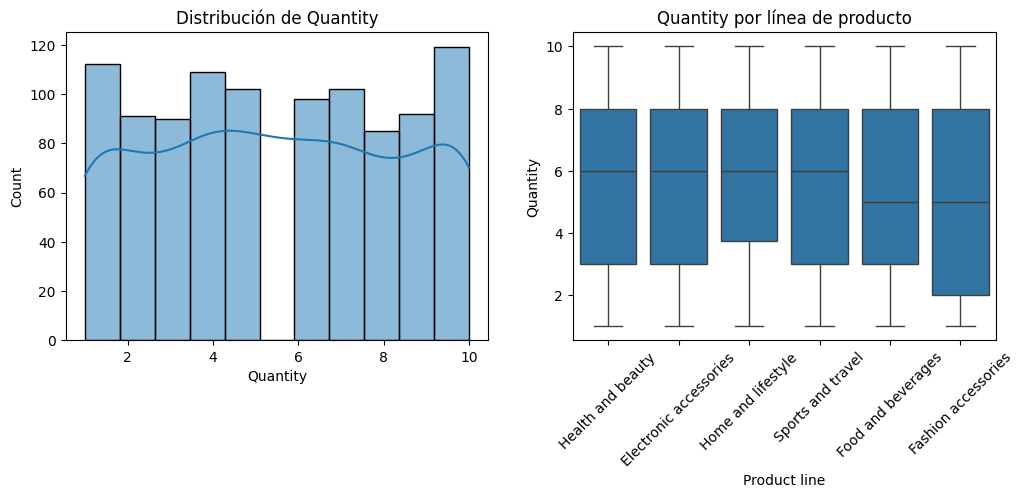

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df['Quantity'], kde=True, ax=axes[0])
axes[0].set_title("Distribución de Quantity")

sns.boxplot(data=df, x='Product line', y='Quantity', ax=axes[1])
axes[1].set_title("Quantity por línea de producto")
plt.xticks(rotation=45)
plt.show()


SVR RMSE: 0.61
SVR R²: 95.16%


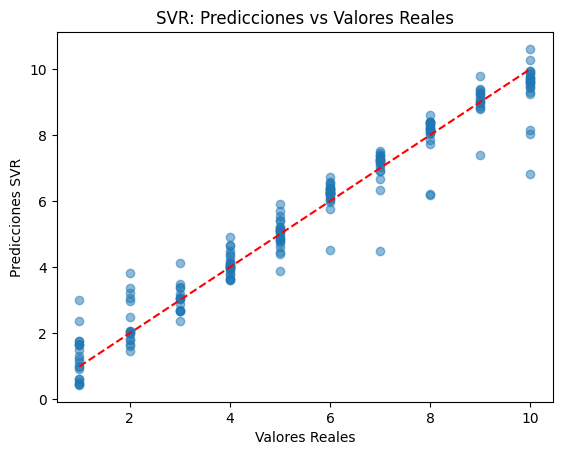

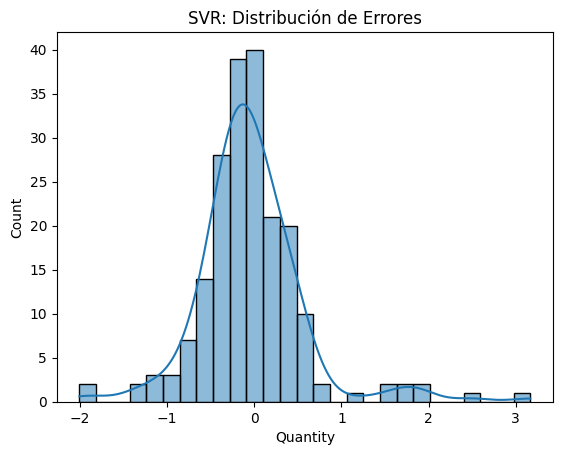

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

target = 'Quantity'
y = df[target]

# Dividir datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo SVR con hiperparámetros por defecto o grid
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_svr = svr.predict(X_test)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr:.2f}")
print(f"SVR R²: {r2_svr:.2%}")

# Gráficos de desempeño (Predicciones vs reales y distribución de errores)
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones SVR")
plt.title("SVR: Predicciones vs Valores Reales")
plt.show()

errores = y_test - y_pred_svr
sns.histplot(errores, kde=True)
plt.title("SVR: Distribución de Errores")
plt.show()


KNN RMSE: 1.74
KNN R²: 61.22%


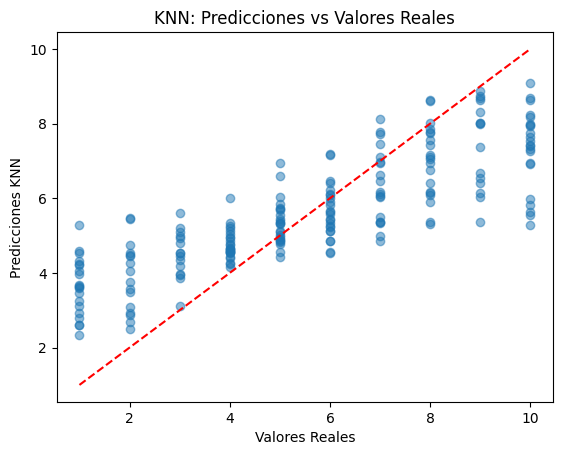

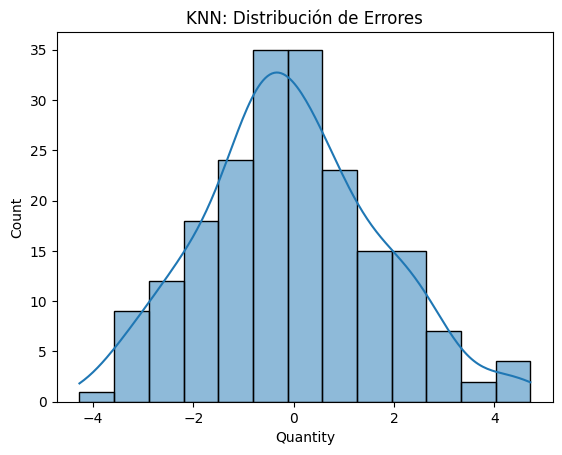

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

target = 'Quantity'
y = df[target]

knn = KNeighborsRegressor(n_neighbors=25, weights='distance')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN RMSE: {rmse_knn:.2f}")
print(f"KNN R²: {r2_knn:.2%}")

plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones KNN")
plt.title("KNN: Predicciones vs Valores Reales")
plt.show()

errores = y_test - y_pred_knn
sns.histplot(errores, kde=True)
plt.title("KNN: Distribución de Errores")
plt.show()


Decision Tree RMSE: 0.84
Decision Tree R²: 90.95%


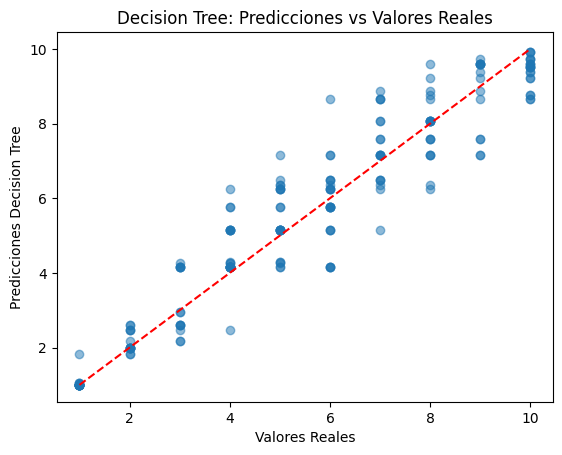

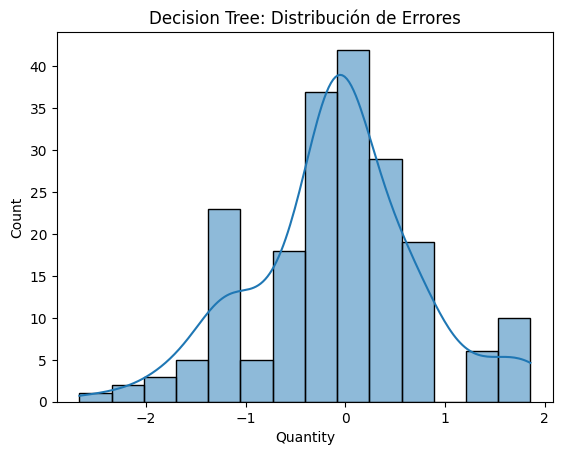

In [ ]:
from sklearn.tree import DecisionTreeRegressor
target = 'Quantity'
y = df[target]

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree R²: {r2_dt:.2%}")

plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones Decision Tree")
plt.title("Decision Tree: Predicciones vs Valores Reales")
plt.show()

errores = y_test - y_pred_dt
sns.histplot(errores, kde=True)
plt.title("Decision Tree: Distribución de Errores")
plt.show()



⚙️ Entrenando y evaluando SVR...
Mejores parámetros SVR: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
SVR RMSE: 0.63
SVR R²: 94.98%


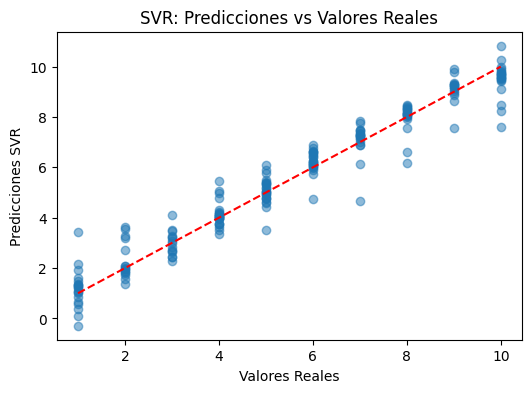

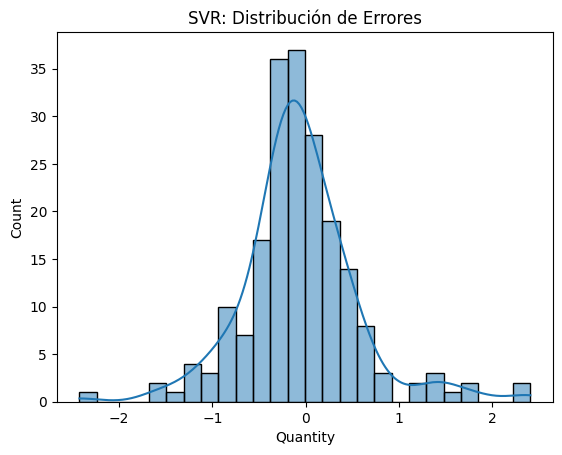


⚙️ Entrenando y evaluando KNN...
Mejores parámetros KNN: {'n_neighbors': 7, 'weights': 'uniform'}
KNN RMSE: 1.81
KNN R²: 58.19%


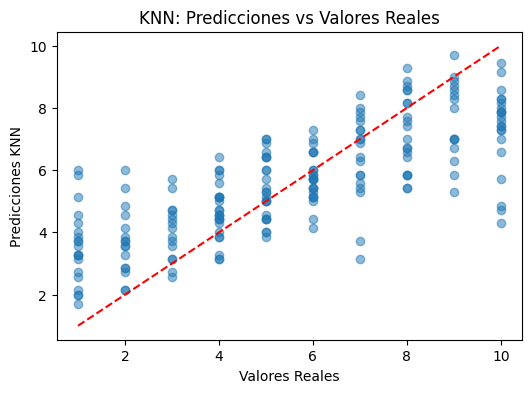

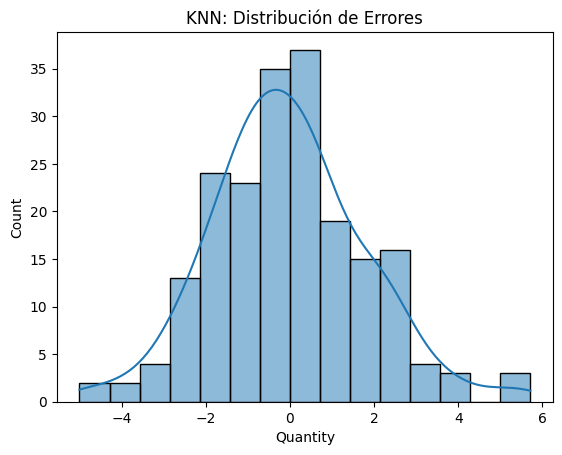


⚙️ Entrenando y evaluando DecisionTree...
Mejores parámetros DecisionTree: {'max_depth': 7, 'min_samples_split': 5}
DecisionTree RMSE: 0.44
DecisionTree R²: 97.46%


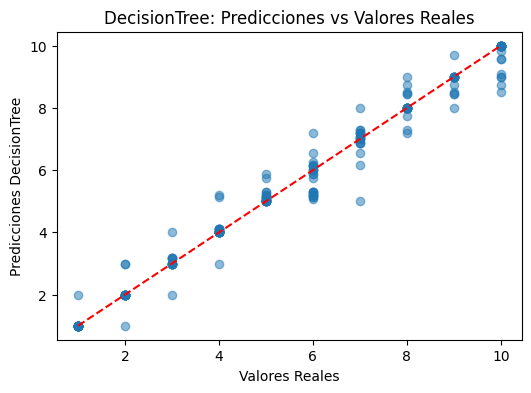

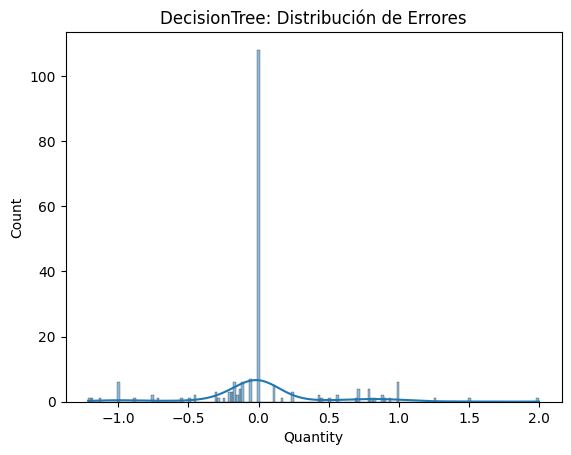

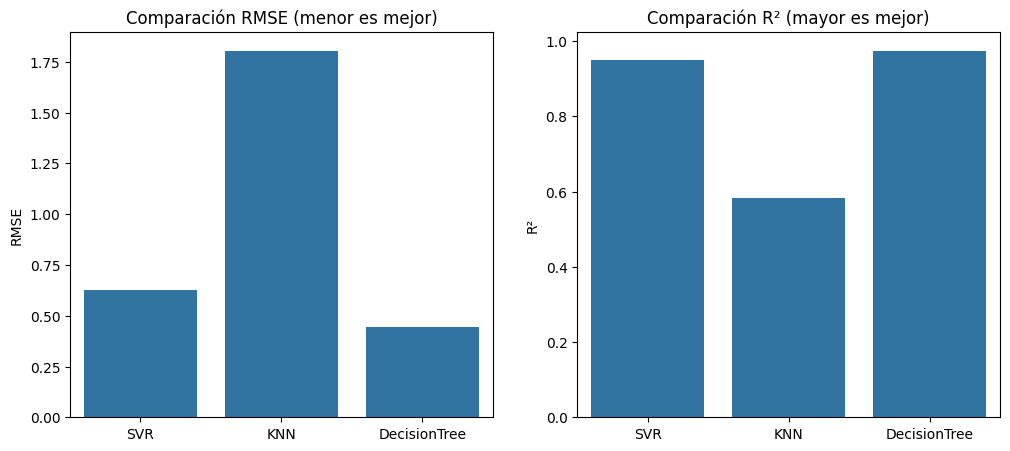


🏆 Mejor modelo guardado: DecisionTree con RMSE 0.44


In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

param_grid = {
    'SVR': {'C': [1, 10, 100], 'epsilon': [0.1, 0.5], 'kernel': ['rbf']},
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'DecisionTree': {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]}
}

best_models = {
    'SVR': GridSearchCV(SVR(), param_grid['SVR'], cv=5, scoring='neg_mean_squared_error'),
    'KNN': GridSearchCV(KNeighborsRegressor(), param_grid['KNN'], cv=5, scoring='neg_mean_squared_error'),
    'DecisionTree': GridSearchCV(DecisionTreeRegressor(), param_grid['DecisionTree'], cv=5, scoring='neg_mean_squared_error')
}

rmse_scores = {}
r2_scores = {}

for name, model in best_models.items():
    print(f"\n Entrenando y evaluando {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Mejores parámetros {name}: {model.best_params_}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} R²: {r2:.2%}")

    # Graficar desempeño
    plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Valores Reales")
    plt.ylabel(f"Predicciones {name}")
    plt.title(f"{name}: Predicciones vs Valores Reales")
    plt.show()

    errores = y_test - y_pred
    sns.histplot(errores, kde=True)
    plt.title(f"{name}: Distribución de Errores")
    plt.show()

    rmse_scores[name] = rmse
    r2_scores[name] = r2

# Comparativa visual
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=list(rmse_scores.keys()), y=list(rmse_scores.values()), ax=ax[0])
ax[0].set_title("Comparación RMSE (menor es mejor)")
ax[0].set_ylabel("RMSE")

sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()), ax=ax[1])
ax[1].set_title("Comparación R² (mayor es mejor)")
ax[1].set_ylabel("R²")

plt.show()

# Guardar mejor modelo
best_name = min(rmse_scores, key=rmse_scores.get)
best_model = best_models[best_name].best_estimator_

joblib.dump(best_model, 'mejor_modelo.joblib')
print(f"\n Mejor modelo guardado: {best_name} con RMSE {rmse_scores[best_name]:.2f}")


In [ ]:
!pip install gradio scikit-learn pandas numpy joblib

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Carga del modelo entrenado
modelo_final = joblib.load('mejor_modelo.joblib')

# Definición de días y meses válidos
dias = list(range(1, 32))
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
         "Julio", "Agosto", "Setiembre", "Octubre", "Noviembre", "Diciembre"]

# Función para predecir la cantidad de productos vendidos
def predecir_ventas(unit_price, tax, day, month, product_line, branch, customer_type, gender, payment):
    try:
        # Validaciones
        if unit_price < 0:
            return "Error: El precio unitario no puede ser negativo."
        if tax < 0:
            return "Error: El impuesto no puede ser negativo."
        if day not in dias:
            return "Error: Día fuera de rango (1-31)."
        if month not in meses:
            return "Error: Mes inválido."

        # Conversión del mes a número
        month_num = meses.index(month) + 1

        # Creación del DataFrame de entrada
        input_data = pd.DataFrame([[unit_price, tax, day, month_num,
                                    product_line, branch, customer_type,
                                    gender, payment]],
                                  columns=features)

        # Transformación y predicción
        processed_input = preprocessor.transform(input_data)
        prediccion = modelo_final.predict(processed_input)[0]
        return round(prediccion, 2)

    except Exception as e:
        return f"Error: {str(e)}"

# Interfaz Gradio
interfaz = gr.Interface(
    fn=predecir_ventas,
    inputs=[
        gr.Number(label="Precio Unitario", info="Precio base del producto antes de impuestos."),
        gr.Number(label="Tax 5%", info="Impuesto aplicado (5% del precio)."),
        gr.Dropdown(choices=dias, label="Día", info="Día del mes en que se realiza la compra."),
        gr.Dropdown(choices=meses, label="Mes", info="Mes correspondiente a la venta."),
        gr.Dropdown(choices=df['Product line'].unique().tolist(), label="Línea de Producto", info="Categoría del producto."),
        gr.Dropdown(choices=['Yangon', 'Mandalay', 'Naypyitaw'], label="Sucursal", info="Sucursal donde se realiza la venta."),
        gr.Dropdown(choices=df['Customer type'].unique().tolist(), label="Tipo de Cliente", info="Cliente nuevo o frecuente."),
        gr.Dropdown(choices=df['Gender'].unique().tolist(), label="Género", info="Género del cliente."),
        gr.Dropdown(choices=df['Payment'].unique().tolist(), label="Método de Pago", info="Medio de pago del cliente.")
    ],
    outputs=gr.Number(label="Cantidad Estimada de Productos Vendidos"),
    title="Predicción de Cantidad de Productos Vendidos",
    description="Complete los datos de una venta para estimar la cantidad probable de productos que serán vendidos.",
    allow_flagging="never"  # Elimina el botón de 'flag'
)

# Ejecución de la interfaz
interfaz.launch()


/usr/local/lib/python3.11/dist-packages/gradio/interface.py:416: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://916ff900930c89bea9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
